In [313]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline

import shapefile as shp
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [314]:
df_navent = pd.read_csv('data/train.csv', dtype={'tipodepropiedad':'category', 'ciudad':'category', 'provincia':'category', 'id':'int32', 'antiguedad':'float16', 'habitaciones':'float16', 'garages':'float16', 'banos':'float16', 'metroscubiertos':'float16', 'metrostotales':'float16', 'idzona':'float16', 'lat':'float16', 'lng':'float16', 'gimnasio':'bool', 'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool', 'centroscomercialescercanos':'bool'}, parse_dates=['fecha'])

In [315]:
precios_dolares = pd.read_csv('../data/precios_en_dolares.csv')

In [316]:
df_navent = df_navent.merge(precios_dolares, how='left')

In [317]:
del precios_dolares

In [361]:
df_navent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 0 to 239999
Data columns (total 24 columns):
id                            240000 non-null int32
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null object
antiguedad                    196445 non-null float16
habitaciones                  217529 non-null float16
garages                       202235 non-null float16
banos                         213779 non-null float16
metroscubiertos               222600 non-null float16
metrostotales                 188533 non-null float16
idzona                        211379 non-null float16
lat                           116512 non-null float16
lng                           116512 non-null float16
fecha                        

## Cloropleth de ciudades

Arranque haciendo con geopandas pero el gráfico no se hacía asi que para el gráfico cambié a basemap 

Los shapefiles se obtienen de: https://esoc.princeton.edu/file-type/gis-data#Mexico (Municipalidades)

In [69]:
fp = 'data/shp/Mexican_Municipalities/Mexican Municipalities.shp'
df_map = gpd.read_file(fp)[['NOM_MUN','geometry']].to_crs('+proj=robin')
df_map = df_map.rename(columns={'NOM_MUN': 'ciudad'})

In [70]:
df_map.head()

,ciudad,geometry
0,Tlalpan,POLYGON ((-9215889.724437028 2064426.635349321...
1,Xochimilco,POLYGON ((-9211408.535305906 2054553.856774347...
2,La Magdalena Contreras,POLYGON ((-9220773.891009877 2061624.955241656...
3,Azcapotzalco,POLYGON ((-9209090.556132214 2085864.636927485...
4,Benito Jurez,POLYGON ((-9210091.704231462 2070291.536902894...


In [71]:
df_map_ciudad = df_map[['ciudad']].copy()

In [72]:
df_map_ciudad.head(2)

,ciudad
0,Tlalpan
1,Xochimilco


In [73]:
#saco tildes para matchear con shapefile
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"á", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"é", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"í", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ó", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ú", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ñ", "")

In [74]:
idx1 = pd.Index(df_navent.ciudad)
idx2 = pd.Index(df_map_ciudad.ciudad)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan, 'Alamo Temapache', 'Alvaro Obregn', 'AnAhuac',
       'ApetatitlAn de Antonio Carvajal', 'Atoyac de Alvarez', 'Bacalar',
       'Cancn', 'Chetumal', 'Chilapa de Alvarez', 'CopAndaro',
       'Juchitn de Zaragoza', 'Pachuca', 'Playa del Carmen', 'PolotitlAn',
       'PuruAndiro', 'TacAmbaro', 'TlaltizapAn de Zapata',
       'Villa de Alvarez', 'Villahermosa', 'Yauhquemecan',
       'Zimatln de Alvarez', 'ZirAndaro', 'catln', 'catln de Jurez',
       'caxochitln', 'cmbaro', 'otra', 'utln de Navarro', 'yotln'],
      dtype=object)

### Respecto de esto hay algunas ciudades que como no tener tildes hubo que examinar cuales si estaban en el shapefile que da la forma del mapa

Con str contains y startwith se vio cuales estaban:

In [75]:
df_map.loc[df_map["ciudad"].str.startswith('') &
           df_map['ciudad'].str.contains('lleza') &
            df_map['ciudad'].str.contains(''),:] 

,ciudad,geometry
700,Balleza,POLYGON ((-9770979.311411895 2910077.414312544...


### No descubiertos y que concluyo que no están en el shapefile:
Villahermosa -
<br>
Cancn -
<br>
Juchitn de Zaragoza -
<br>
Playa del Carmen -
<br>
Chetumal -
<br>
Bacalar -
<br>
Otra - Es otra, no es una ciudad
<br>
### Descubiertos:
Alamo Temapache - Alamos (SHP)
<br>
Alvaro Obregn - lvaro Obregn (SHP)
<br>
AnAhuac - Anhuac (SHP)
<br>
ApetatitlAn de Antonio Carvajal - Apetatitln de Antonio Carvajal (SHP)
<br>
Atoyac de Alvarez - Atoyac de lvarez (SHP)
<br>
Chilapa de Alvarez - Chilapa de lvarez (SHP)
<br>
CopAndaro - Copndaro (SHP)
<br>
Pachuca - Pachuca de Soto (SHP)
<br>
PolotitlAn - Polotitln (SHP)
<br>
PuruAndiro - Purundiro (SHP)
<br>
TacAmbaro - Tacmbaro (SHP)
<br>
TlaltizapAn de Zapata - Tlaltizapn (SHP)
<br>
Villa de Alvarez - Villa de lvarez (SHP)
<br>
Yauhquemecan - Yauhquemehcan (SHP)
<br>
Zimatln de Alvarez - Zimatln de lvarez (SHP)
<br>
ZirAndaro - Zirndaro (SHP)
<br>
catln - Acatln (SHP)
<br>
catln de Jurez - Acatln de Jurez (SHP)
<br>
caxochitln - Acaxochitln (SHP)
<br>
cmbaro - Acmbaro (SHP)
<br>
utln de Navarro - Autln de Navarro (SHP)
<br>
yotln - Ayotln (SHP)

In [76]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['ciudad'] = df_navent['ciudad'].replace({"Alamo Temapache": "Alamos"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Alvaro Obregn": "lvaro Obregn"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"AnAhuac": "Anhuac"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"ApetatitlAn de Antonio Carvajal": "Apetatitln de Antonio Carvajal"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Atoyac de Alvarez": "Atoyac de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Chilapa de Alvarez": "Chilapa de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"CopAndaro": "Copndaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Pachuca": "Pachuca de Soto"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"PolotitlAn": "Polotitln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"PuruAndiro": "Purundiro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"TlaltizapAn de Zapata": "Tlaltizapn"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Villa de Alvarez": "Villa de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Yauhquemecan": "Yauhquemehcan"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Zimatln de Alvarez": "Zimatln de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"ZirAndaro": "Zirndaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"catln de Jurez": "Acatln de Jurez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"caxochitln": "Acaxochitln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"utln de Navarro": "Autln de Navarro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"yotln": "Ayotln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"cmbaro": "Acmbaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"TacAmbaro": "Tacmbaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({'catln':'Acatln'})

In [77]:
df_navent_ciudad = df_navent[['id','ciudad']].copy()

In [78]:
df_navent_ciudad = df_navent_ciudad.groupby('ciudad').agg(np.size).sort_values(by="id",ascending=False).rename(columns={'id': 'cantidad'}).reset_index()

In [79]:
df_navent_ciudad.head()

,ciudad,cantidad
0,Quertaro,12646
1,Benito Jurez,11014
2,Zapopan,10360
3,San Luis Potos,7925
4,Mrida,7162


/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


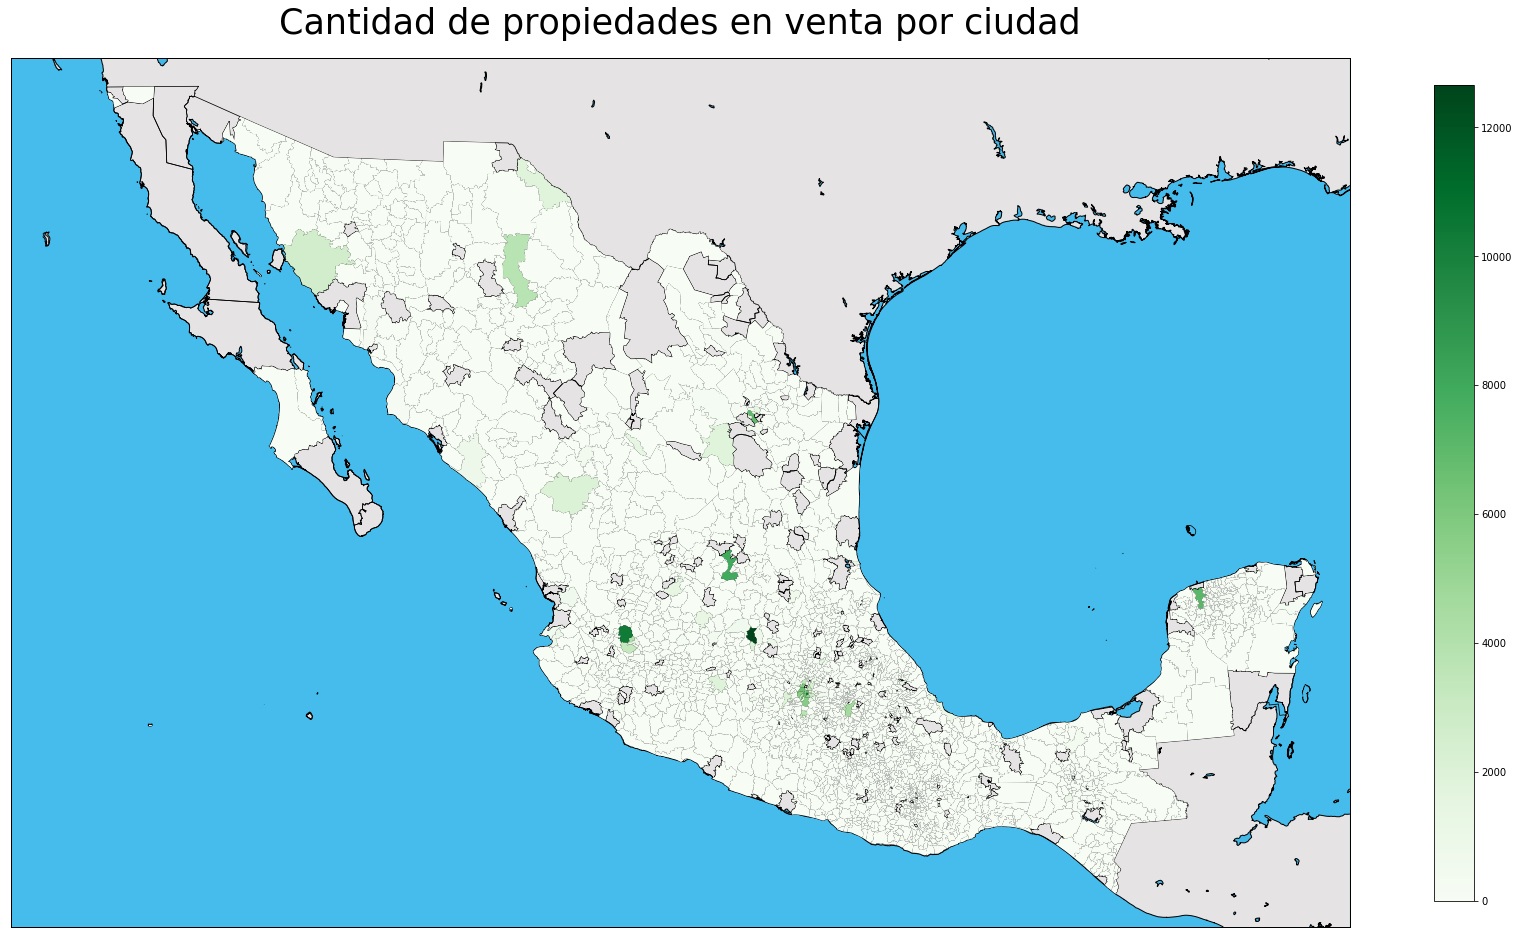

In [80]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_Municipalities/Mexican Municipalities','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'ciudad': [ciudad['NOM_MUN'] for ciudad in mexicoMap.shapefile_info]
    })

merge_ciudad_and_map = df_map_shp.merge(df_navent_ciudad, on='ciudad', how='left')
merge_ciudad_and_map = merge_ciudad_and_map.drop_duplicates('ciudad')


#fig configuration
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(merge_ciudad_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_ciudad_and_map['cantidad'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_ciudad_and_map['cantidad'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Cantidad de propiedades en venta por ciudad",fontsize=35,pad=25)
#plt.savefig('img/cant_prop_en_venta_ciudad.png')
plt.show()

## Cloropleth de provincias

In [81]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [82]:
df_map_provincia = df_map_2[['provincia']].copy()

In [83]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [84]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan, 'Baja California Norte', 'Coahuila', 'Edo. de Mxico',
       'Michoacn', 'San luis Potos', 'Veracruz'], dtype=object)

In [85]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

,provincia,geometry
5,Baja California,(POLYGON ((-10267308.38027523 3039426.90017507...
7,Baja California Sur,(POLYGON ((-10145912.8575157 2446511.567166308...


### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [86]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [87]:
df_navent_provincia = df_navent[['id','provincia']].copy()

In [88]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.size).sort_values(by="id",ascending=False).rename(columns={'id': 'cantidad'}).reset_index()

In [89]:
df_navent_provincia.head()

,provincia,cantidad
0,Distrito Federal,58790
1,Mxico,41607
2,Jalisco,21238
3,Quertaro,16988
4,Nuevo Len,15324


/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


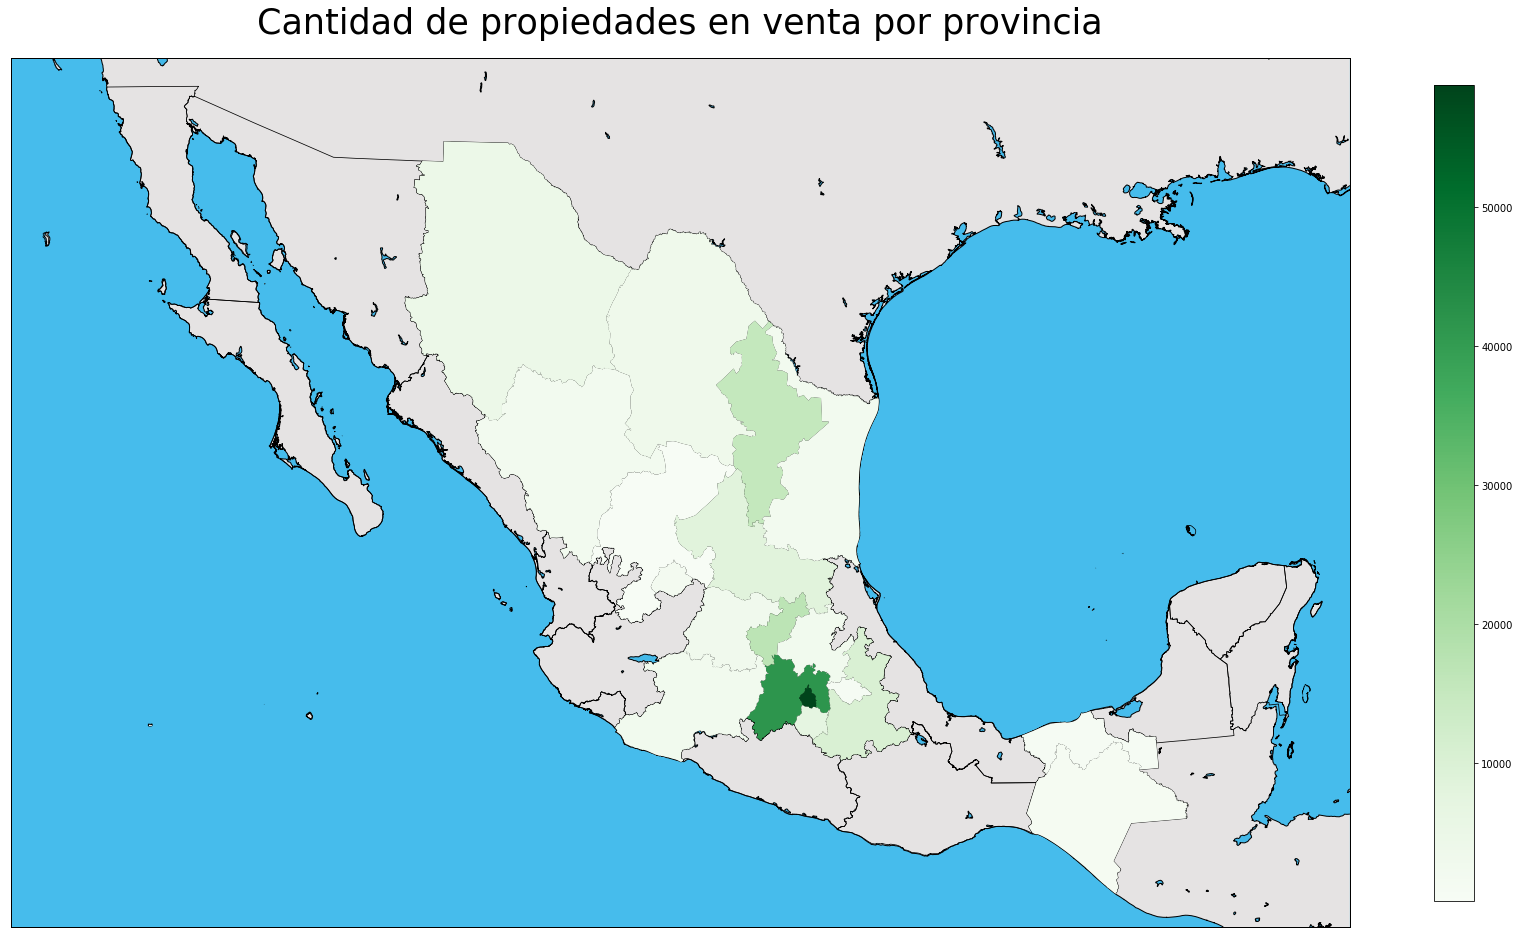

In [90]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')
merge_provincia_and_map = merge_provincia_and_map.drop_duplicates('provincia')


#fig configuration
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['cantidad'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['cantidad'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Cantidad de propiedades en venta por provincia",fontsize=35, pad=25)
#plt.savefig('img/cant_prop_en_venta_provincia.png')
plt.show()

In [334]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [335]:
df_map_provincia = df_map_2[['provincia']].copy()

In [336]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [337]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan], dtype=object)

In [338]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

,provincia,geometry
5,Baja California,(POLYGON ((-10267308.38027523 3039426.90017507...
7,Baja California Sur,(POLYGON ((-10145912.8575157 2446511.567166308...


### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [339]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [340]:
df_navent_provincia = df_navent[['precio','provincia']].copy()

In [341]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.mean).sort_values(by="precio",ascending=False).rename(columns={'precio': 'promedio'}).reset_index()

In [342]:
df_navent_provincia.head()

,provincia,promedio
0,Distrito Federal,3.471705e+06
1,Mxico,2.762465e+06
2,Nuevo Len,2.717758e+06
3,Guerrero,2.548742e+06
4,Quintana Roo,2.402967e+06


/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



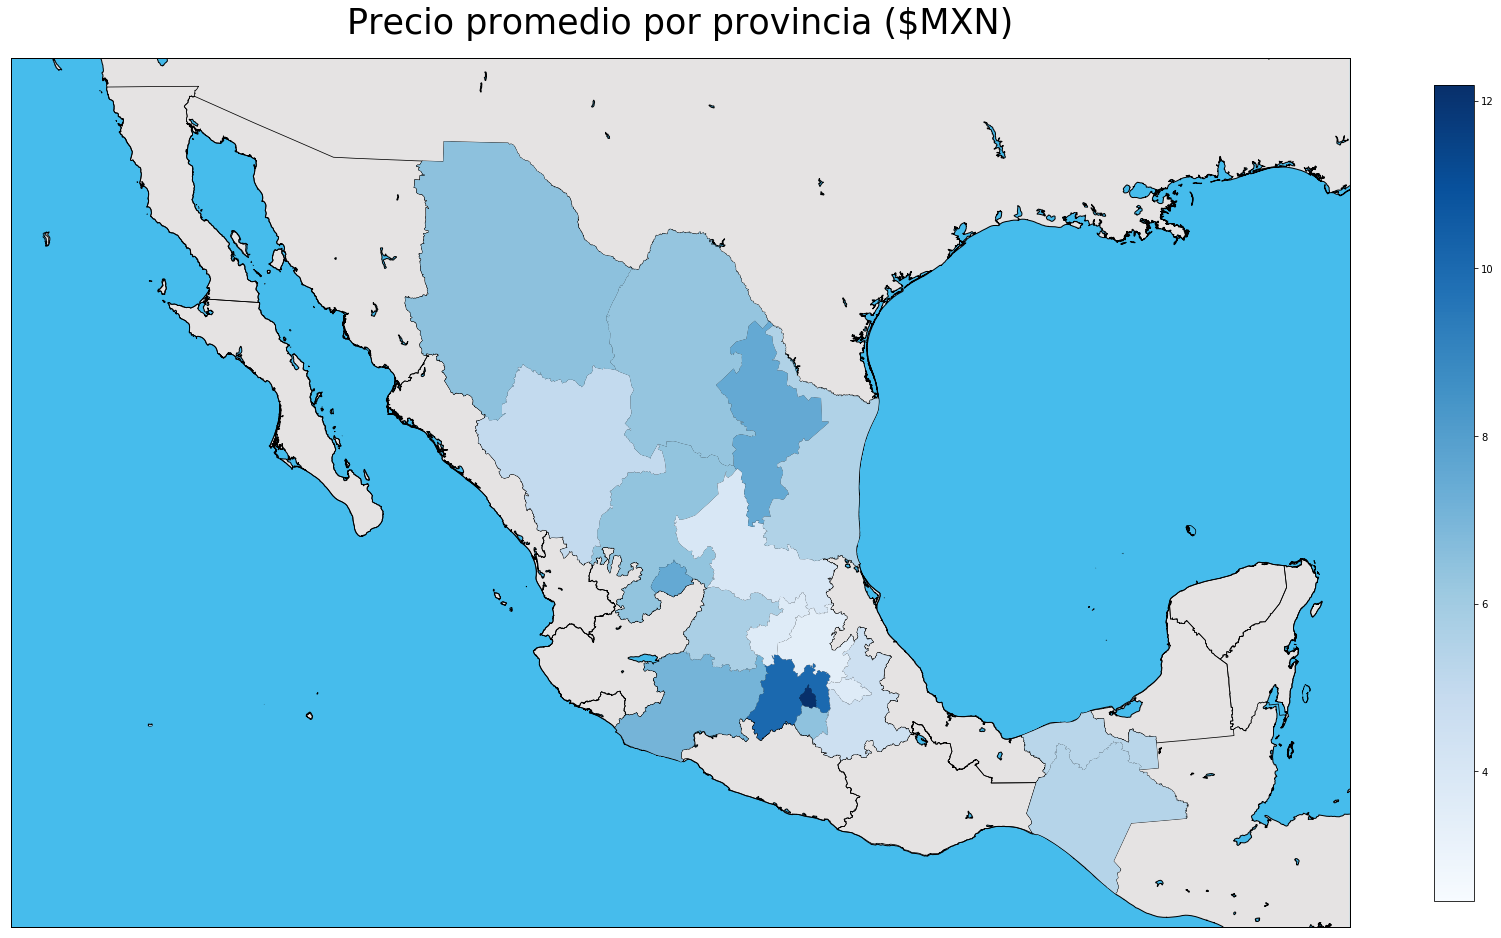

In [372]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')
merge_provincia_and_map = merge_provincia_and_map.drop_duplicates('provincia')


#fig configuration
cmap = plt.get_cmap('Blues')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['promedio'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['promedio'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Precio promedio por provincia ($MXN)",fontsize=35, pad=25)
plt.savefig('img/promedio_por_provincia_mxn.png',bbox_inches = 'tight')
plt.show()

In [345]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [346]:
df_map_provincia = df_map_2[['provincia']].copy()

In [347]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [348]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan], dtype=object)

In [349]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

,provincia,geometry
5,Baja California,(POLYGON ((-10267308.38027523 3039426.90017507...
7,Baja California Sur,(POLYGON ((-10145912.8575157 2446511.567166308...


### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [350]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [351]:
df_navent_provincia = df_navent[['precio_usd','provincia']].copy()

In [352]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.mean).sort_values(by="precio_usd",ascending=False).rename(columns={'precio_usd': 'promedio'}).reset_index()

In [353]:
df_navent_provincia.head()

,provincia,promedio
0,Distrito Federal,220761.967954
1,Mxico,174643.359771
2,Guerrero,163848.586258
3,Nuevo Len,161832.090512
4,Tabasco,155490.257545


/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



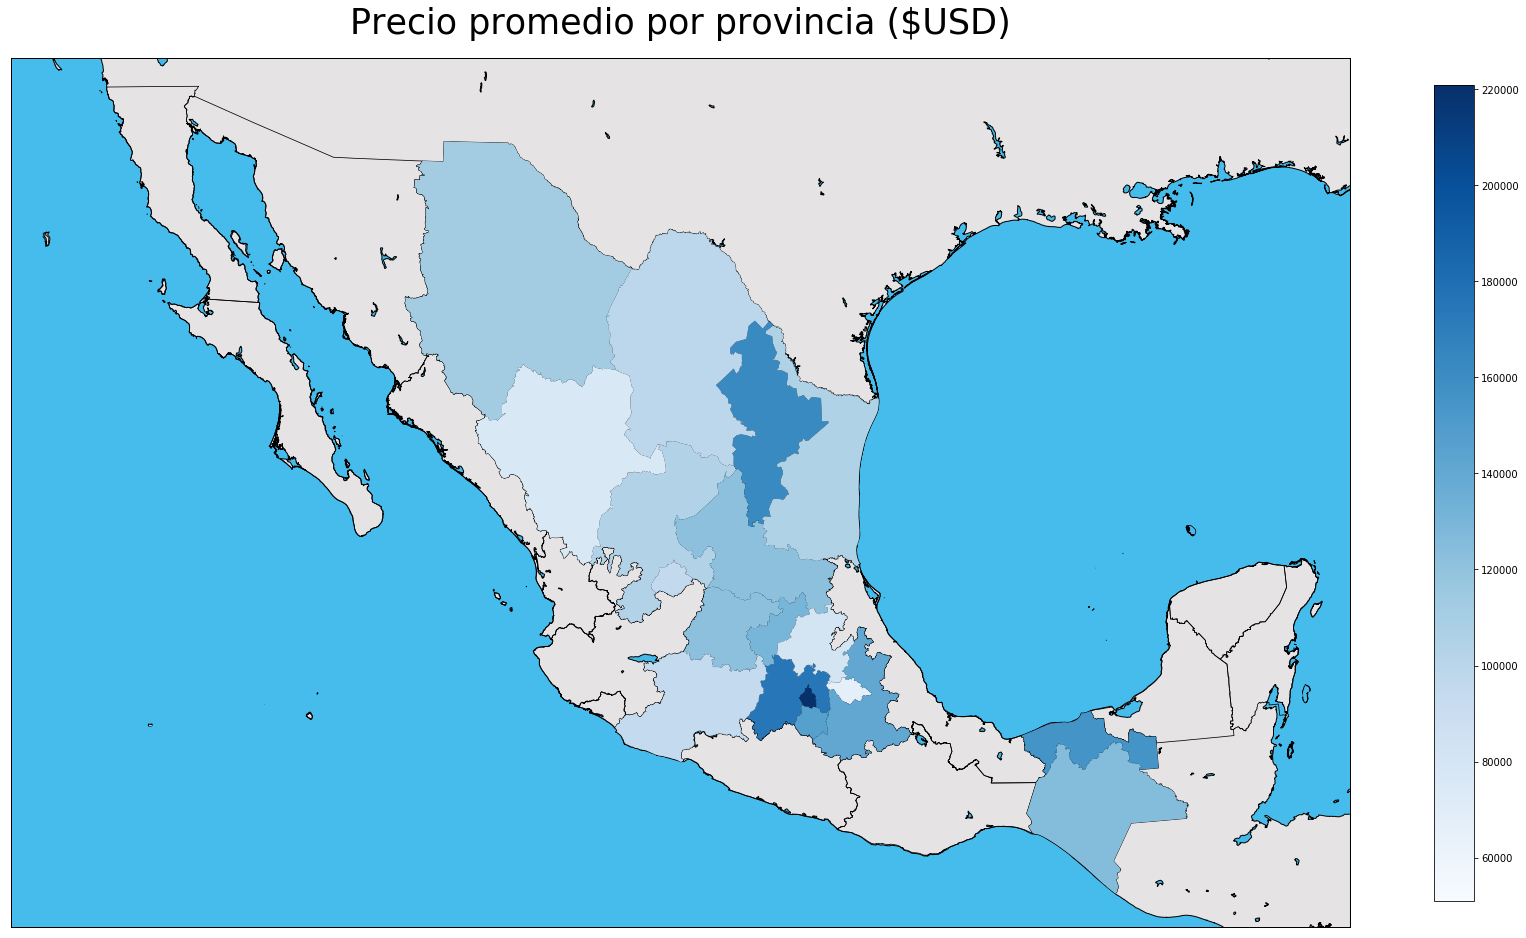

In [359]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')
merge_provincia_and_map = merge_provincia_and_map.drop_duplicates('provincia')


#fig configuration
cmap = plt.get_cmap('Blues')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['promedio'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['promedio'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Precio promedio por provincia ($USD)",fontsize=35, pad=25)
plt.savefig('img/promedio_por_provincia_usd.png',bbox_inches = 'tight')
plt.show()

In [362]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [363]:
df_map_provincia = df_map_2[['provincia']].copy()

In [364]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [365]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan], dtype=object)

In [366]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

,provincia,geometry
5,Baja California,(POLYGON ((-10267308.38027523 3039426.90017507...
7,Baja California Sur,(POLYGON ((-10145912.8575157 2446511.567166308...


### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [367]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [368]:
df_navent_provincia = df_navent[['antiguedad','provincia']].copy()

In [369]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.mean).sort_values(by="antiguedad",ascending=False).rename(columns={'antiguedad': 'promedio'}).reset_index()

In [370]:
df_navent_provincia.head()

,provincia,promedio
0,Distrito Federal,12.187500
1,Mxico,10.031250
2,Guerrero,7.605469
3,Nuevo Len,7.539062
4,Aguascalientes,7.523438


/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



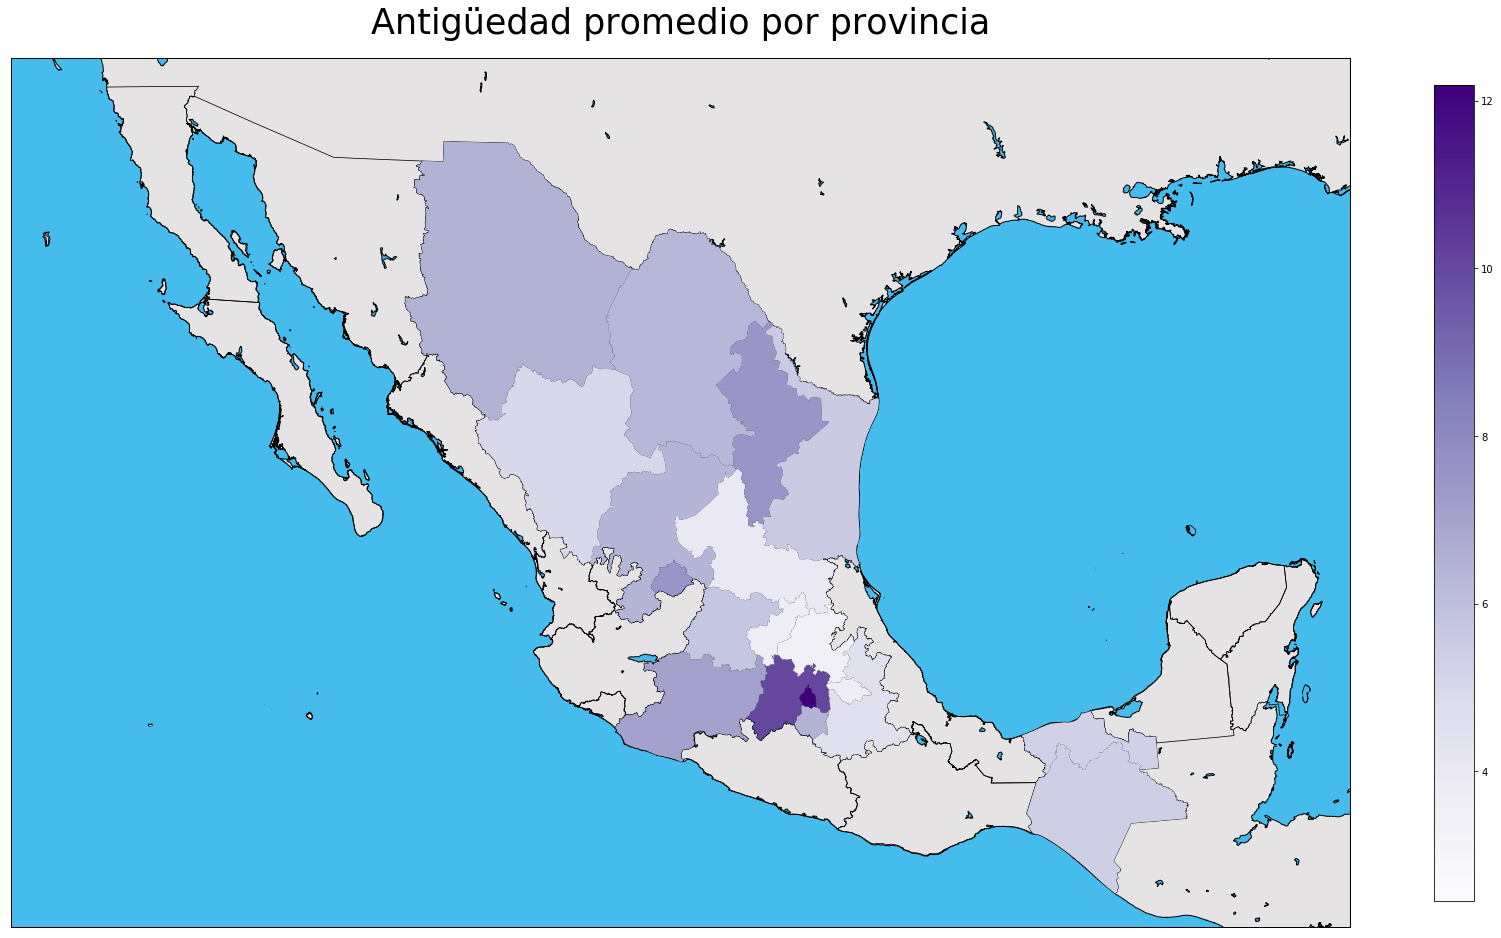

In [373]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')
merge_provincia_and_map = merge_provincia_and_map.drop_duplicates('provincia')


#fig configuration
cmap = plt.get_cmap('Purples')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['promedio'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['promedio'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Antigüedad promedio por provincia",fontsize=35, pad=25)
plt.savefig('img/promedio_por_provincia_antiguedad.png',bbox_inches = 'tight')
plt.show()

## Precio ($MXN) VS algo

## Precio vs cantidad de habitaciones

Hasta 5 habitaciones

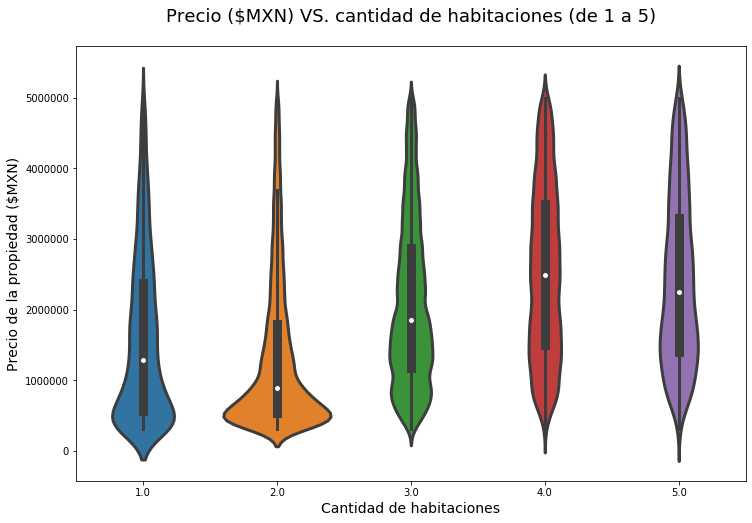

In [116]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 0)&(df_navent['habitaciones'] <= 5) \
               &(df_navent['precio'] < 5000000),['habitaciones', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de habitaciones (de 1 a 5)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_hab_1_a_5.png')
plt.show()

De 5 a 10 habitaciones

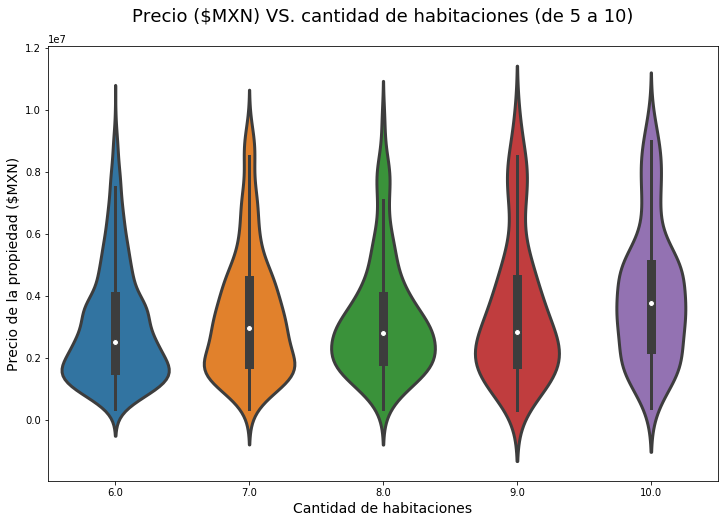

In [117]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 5)&(df_navent['habitaciones'] <= 10) \
               &(df_navent['precio'] < 10000000),['habitaciones', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de habitaciones (de 5 a 10)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_hab_5_a_10.png')
plt.show()

## Precio vs cantidad de garages

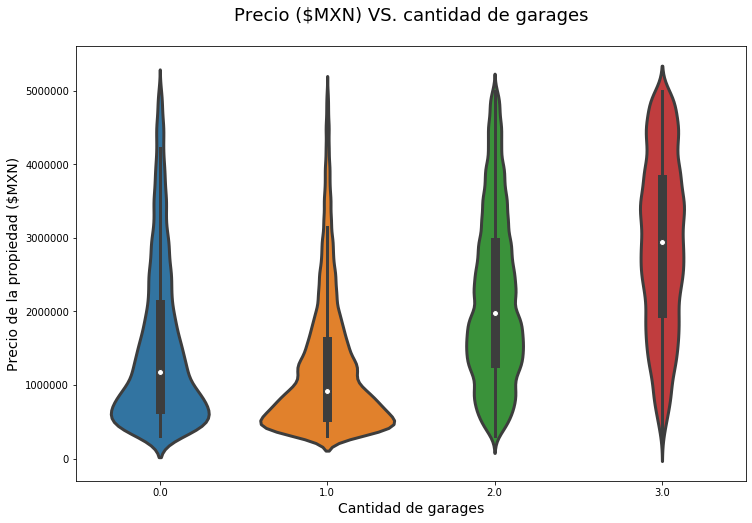

In [118]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio'] < 5000000),['garages', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='garages', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de garages",fontsize=18, pad=25)
plt.xlabel("Cantidad de garages",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_gar.png')
plt.show()

## Precio vs cantidad de baños

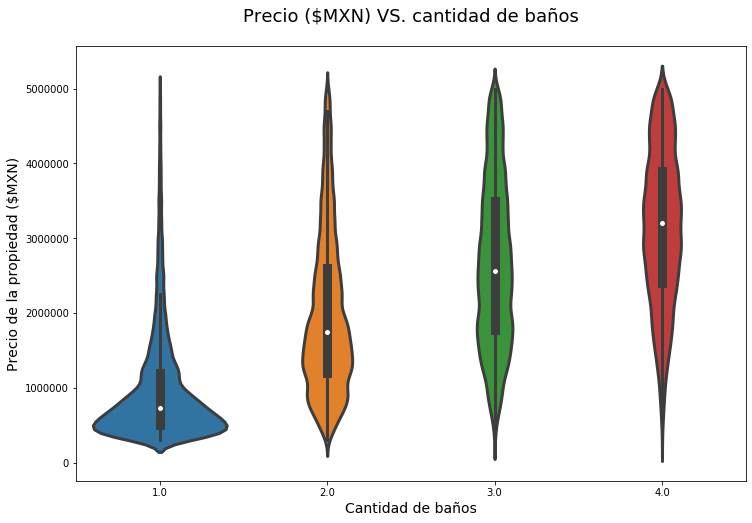

In [119]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio'] < 5000000),['banos', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='banos', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de baños",fontsize=18, pad=25)
plt.xlabel("Cantidad de baños",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_ban.png')
plt.show()

## Precio ($USD) VS algo

## Precio vs cantidad de habitaciones

Hasta 5 habitaciones

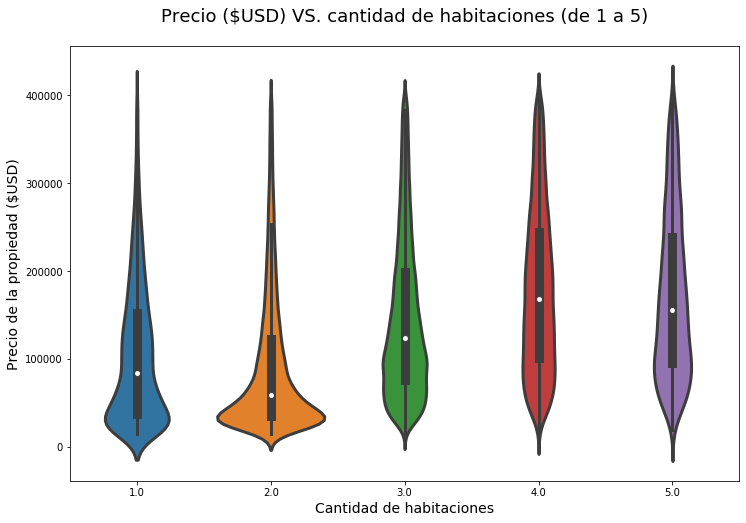

In [120]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 0)&(df_navent['habitaciones'] <= 5) \
               &(df_navent['precio_usd'] < 400000),['habitaciones', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de habitaciones (de 1 a 5)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_hab_1_a_5.png')
plt.show()

De 5 a 10 habitaciones

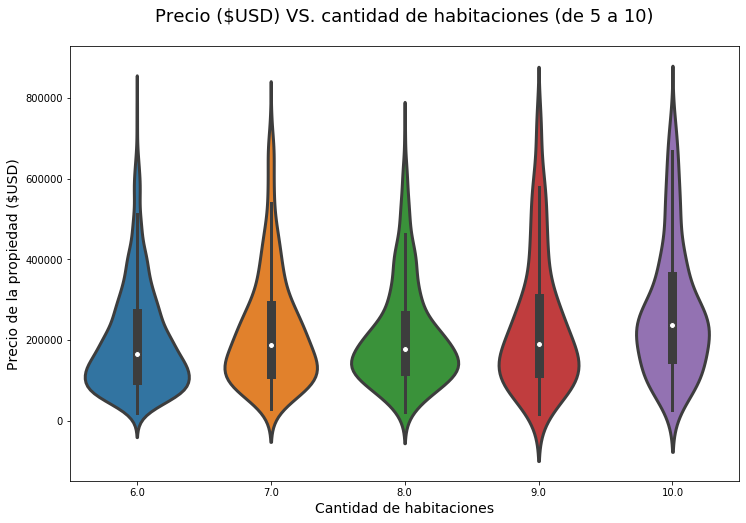

In [121]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 5)&(df_navent['habitaciones'] <= 10) \
               &(df_navent['precio_usd'] < 800000),['habitaciones', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de habitaciones (de 5 a 10)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_hab_5_a_10.png')
plt.show()

## Precio vs cantidad de garages

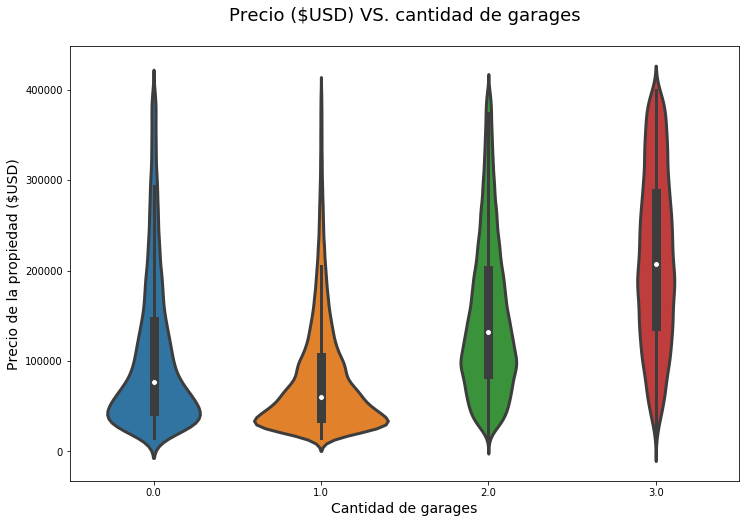

In [122]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio_usd'] < 400000),['garages', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='garages', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de garages",fontsize=18, pad=25)
plt.xlabel("Cantidad de garages",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_gar.png')
plt.show()

## Precio vs cantidad de baños

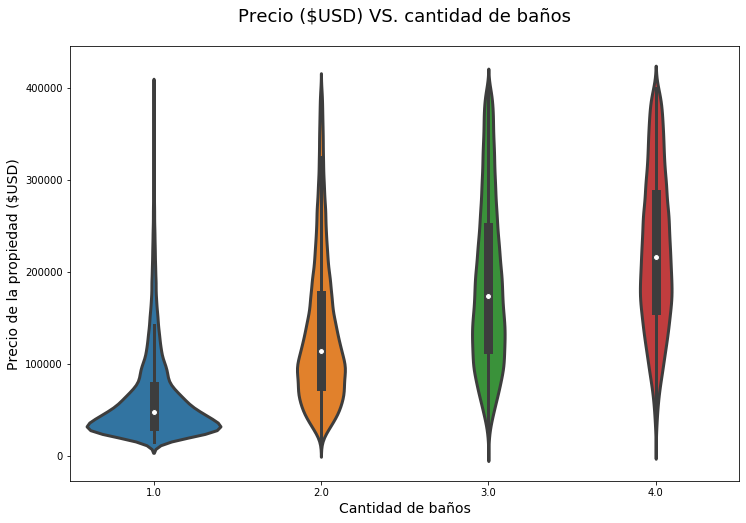

In [123]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio_usd'] < 400000),['banos', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='banos', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de baños",fontsize=18, pad=25)
plt.xlabel("Cantidad de baños",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_ban.png')
plt.show()

## Tipo de propiedad - datos cruzados - analisis de NaNs al cruzar los datos

Aquí se va viendo que categorias se deberian dejar para usarlo en el analisis ya que se pierden muchos datos al intentar cruzarlos y los graficos no soportan NaNs. 
<br>
Aquellos con porcentaje mayor a 70% se dejan

In [117]:
df = df_navent.copy()

In [118]:
df = df[['tipodepropiedad','banos','habitaciones','garages']]

In [119]:
df['tipodepropiedad'].cat.categories

Index(['Apartamento', 'Bodega comercial', 'Casa', 'Casa en condominio',
       'Casa uso de suelo', 'Departamento Compartido', 'Duplex', 'Edificio',
       'Huerta', 'Inmuebles productivos urbanos', 'Local Comercial',
       'Local en centro comercial', 'Lote', 'Nave industrial',
       'Oficina comercial', 'Otros', 'Quinta Vacacional', 'Rancho', 'Terreno',
       'Terreno comercial', 'Terreno industrial', 'Villa', 'Hospedaje',
       'Garage'],
      dtype='object')

In [120]:
df_old = df.tipodepropiedad.value_counts()

In [121]:
df = df.dropna()

In [122]:
df_new = df.tipodepropiedad.value_counts()

In [123]:
print ("Casa:", df_new['Casa'] / df_old['Casa'])
print ("Apartamento:", df_new['Apartamento'] / df_old['Apartamento'])
print ("Bodega comercial:", df_new['Bodega comercial'] / df_old['Bodega comercial'])
print ("Casa en condominio:", df_new['Casa en condominio'] / df_old['Casa en condominio'])
print ("Casa uso de suelo:", df_new['Casa uso de suelo'] / df_old['Casa uso de suelo'])
print ("Departamento Compartido:", df_new['Departamento Compartido'] / df_old['Departamento Compartido'])
print ("Duplex:", df_new['Duplex'] / df_old['Duplex'])
print ("Edificio:", df_new['Edificio'] / df_old['Edificio'])
print ("Huerta:", df_new['Huerta'] / df_old['Huerta'])
print ("Inmuebles productivos urbanos:", df_new['Inmuebles productivos urbanos'] / df_old['Inmuebles productivos urbanos'])
print ("Local Comercial:", df_new['Local Comercial'] / df_old['Local Comercial'])
print ("Local en centro comercial:", df_new['Local en centro comercial'] / df_old['Local en centro comercial'])
print ("Nave industrial:", df_new['Nave industrial'] / df_old['Nave industrial'])
print ("Oficina comercial:", df_new['Oficina comercial'] / df_old['Oficina comercial'])
print ("Otros:", df_new['Otros'] / df_old['Otros'])
print ("Quinta Vacacional:", df_new['Quinta Vacacional'] / df_old['Quinta Vacacional'])
print ("Rancho:", df_new['Rancho'] / df_old['Rancho'])
print ("Terreno:", df_new['Terreno'] / df_old['Terreno'])
print ("Terreno comercial:", df_new['Terreno comercial'] / df_old['Terreno comercial'])
print ("Terreno industrial:", df_new['Terreno industrial'] / df_old['Terreno industrial'])
print ("Villa:", df_new['Villa'] / df_old['Villa'])
print ("Hospedaje:", df_new['Hospedaje'] / df_old['Hospedaje'])
print ("Garage:", df_new['Garage'] / df_old['Garage'])

Casa: 0.7825737208662334
Apartamento: 0.9111456026229051
Bodega comercial: 0.05334281650071124
Casa en condominio: 0.8019899466238275
Casa uso de suelo: 0.4081920903954802
Departamento Compartido: 0.9148936170212766
Duplex: 0.9620991253644315
Edificio: 0.07736389684813753
Huerta: 0.15
Inmuebles productivos urbanos: 0.175
Local Comercial: 0.06382978723404255
Local en centro comercial: 0.04242424242424243
Nave industrial: 0.06578947368421052
Oficina comercial: 0.10109132682366456
Otros: 0.3283582089552239
Quinta Vacacional: 0.31139240506329113
Rancho: 0.3
Terreno: 0.02262443438914027
Terreno comercial: 0.030165912518853696
Terreno industrial: 0.06451612903225806
Villa: 0.5058823529411764
Hospedaje: 0.0
Garage: 0.0


Se pueden dejar los siguientes:
<br>
<br>
Casa
<br>
Apartamento
<br>
Casa en condominio
<br>
Departamento compartido
<br>
Duplex

## Coordenadas paralelas 

In [185]:
df = df_navent.copy()

In [186]:
df = df[['tipodepropiedad','banos','habitaciones','garages']]

In [187]:
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()

In [188]:
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)

In [189]:
df['tipodepropiedad'].cat.categories

Index(['Casa', 'Apartamento', 'Casa en condominio', 'Departamento Compartido',
       'Duplex'],
      dtype='object')

In [190]:
df = df.dropna()

In [191]:
df.head()

,tipodepropiedad,banos,habitaciones,garages
0,Apartamento,2.0,2.0,1.0
1,Casa en condominio,2.0,3.0,2.0
2,Casa,2.0,3.0,2.0
3,Casa,1.0,2.0,1.0
4,Apartamento,1.0,2.0,1.0


In [192]:
df.tipodepropiedad.value_counts()

Casa                       110904
Apartamento                 52246
Casa en condominio          15476
Duplex                        330
Departamento Compartido       129
Name: tipodepropiedad, dtype: int64

In [193]:
df['code'] = df.tipodepropiedad.cat.codes

In [194]:
df.head()

,tipodepropiedad,banos,habitaciones,garages,code
0,Apartamento,2.0,2.0,1.0,1
1,Casa en condominio,2.0,3.0,2.0,2
2,Casa,2.0,3.0,2.0,0
3,Casa,1.0,2.0,1.0,0
4,Apartamento,1.0,2.0,1.0,1


In [195]:
df.code.value_counts()

0    110904
1     52246
2     15476
4       330
3       129
Name: code, dtype: int64

In [199]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='FCozza', api_key='fpQ9YB5Ekgy3YU8BZU2V')

data = [go.Parcoords(
        line = dict(color = df['code'],
                   colorscale = 'Jet'),
        dimensions = list([
            dict(range = [0,max(df['banos'])],
                label = 'Baños', values = df['banos']),
            dict(range = [0,max(df['habitaciones'])],
                label = 'Habitaciones', values = df['habitaciones']),
            dict(range = [0,max(df['garages'])],
                label = 'Garages', values = df['garages'])]))]
layout = go.Layout(title='Comparación de atributos del interior entre diferentes tipos de propiedad')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

## Radar chart

In [207]:
df = df_navent.copy()

In [208]:
df = df[['tipodepropiedad','banos','habitaciones','garages']]

In [209]:
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()

In [210]:
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)

In [211]:
df['tipodepropiedad'].cat.categories

Index(['Casa', 'Apartamento', 'Casa en condominio', 'Departamento Compartido',
       'Duplex'],
      dtype='object')

In [212]:
df = df.dropna()

In [213]:
df.head()

,tipodepropiedad,banos,habitaciones,garages
0,Apartamento,2.0,2.0,1.0
1,Casa en condominio,2.0,3.0,2.0
2,Casa,2.0,3.0,2.0
3,Casa,1.0,2.0,1.0
4,Apartamento,1.0,2.0,1.0


In [214]:
df.tipodepropiedad.value_counts()

Casa                       110904
Apartamento                 52246
Casa en condominio          15476
Duplex                        330
Departamento Compartido       129
Name: tipodepropiedad, dtype: int64

In [215]:
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

In [216]:
df.head(10)

,tipodepropiedad,banos,habitaciones,garages
0,Casa,2.175781,3.013672,1.722656
1,Apartamento,1.794922,2.375000,1.422852
2,Casa en condominio,2.300781,2.910156,1.913086
3,Departamento Compartido,1.751953,2.472656,1.379883
4,Duplex,1.333008,2.490234,1.187500


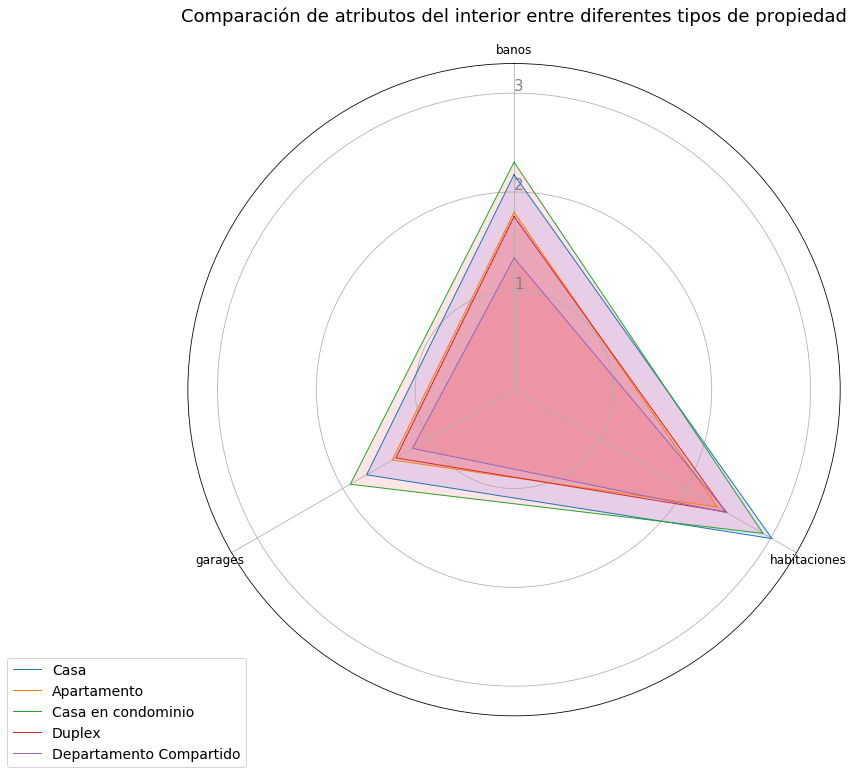

In [291]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre diferentes tipos de propiedad',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop.png',bbox_inches = 'tight')
plt.show()

In [292]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

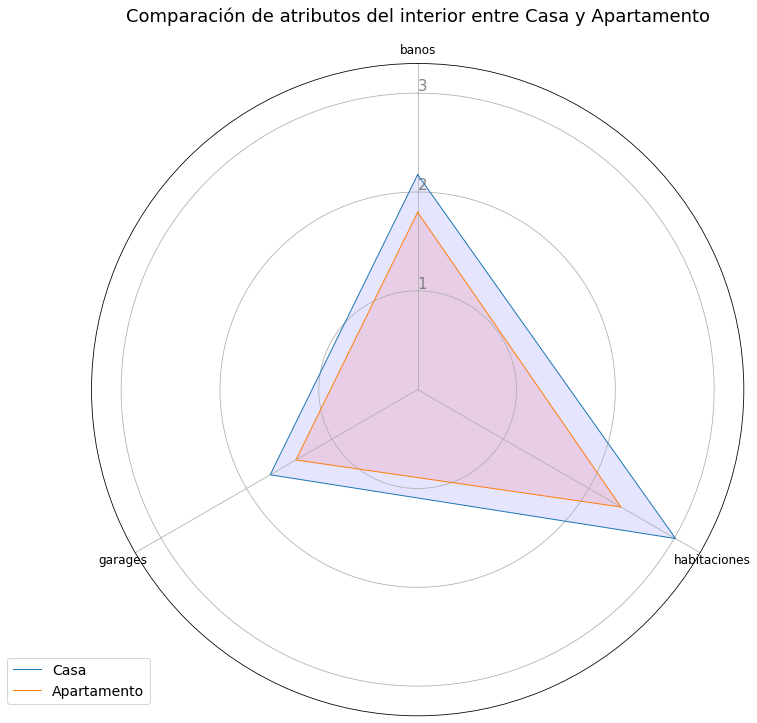

In [293]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa y Apartamento',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_casa_apart.png',bbox_inches = 'tight')
plt.show()

In [294]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

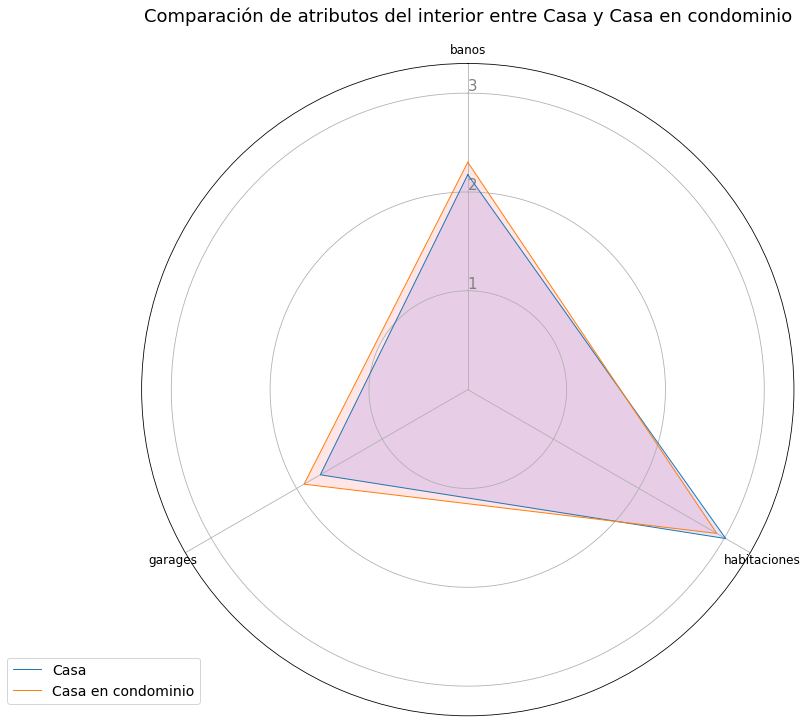

In [295]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa y Casa en condominio',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_casa_condo.png',bbox_inches = 'tight')
plt.show()

In [296]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

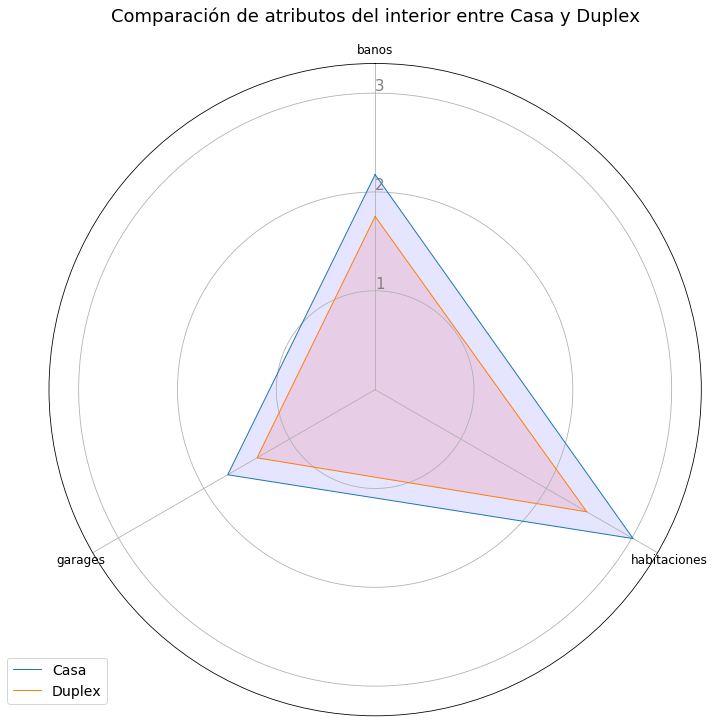

In [297]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_casa_duplex.png',bbox_inches = 'tight')
plt.show()

In [298]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

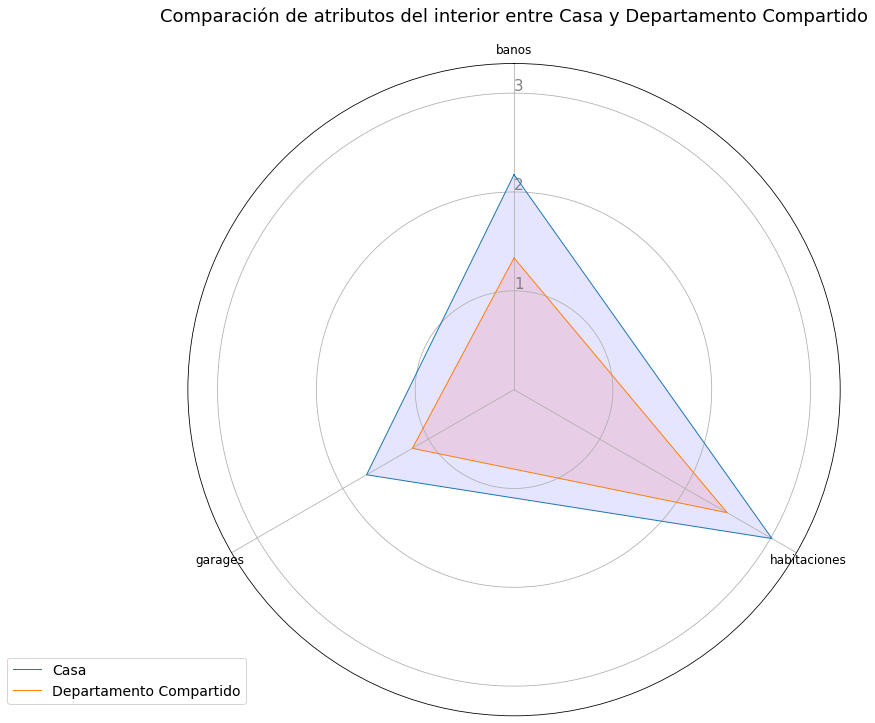

In [299]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_casa_dpto.png',bbox_inches = 'tight')
plt.show()

In [300]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

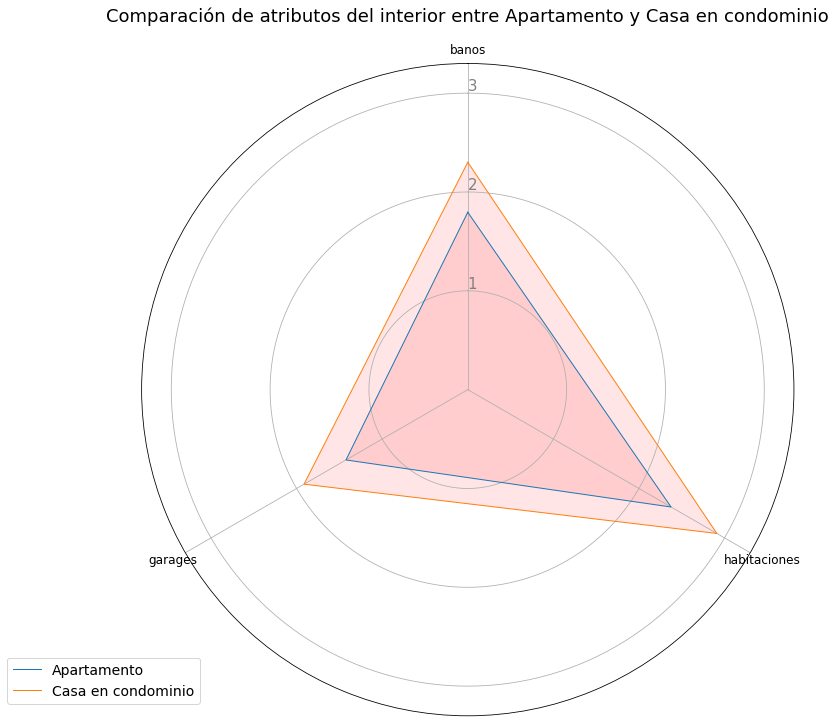

In [301]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Apartamento y Casa en condominio',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_apart_condo.png',bbox_inches = 'tight')
plt.show()

In [302]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

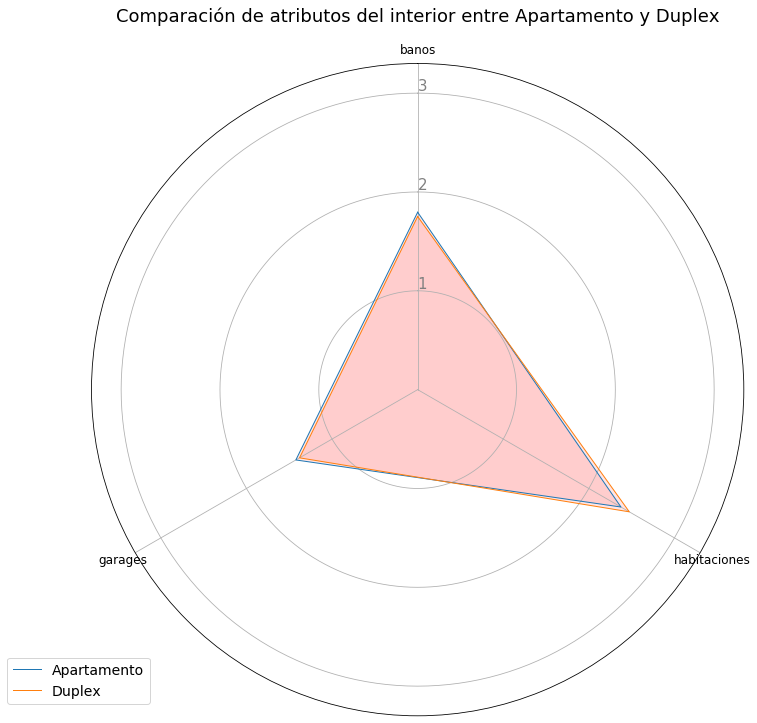

In [303]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Apartamento y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_apart_duplex.png',bbox_inches = 'tight')
plt.show()

In [304]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

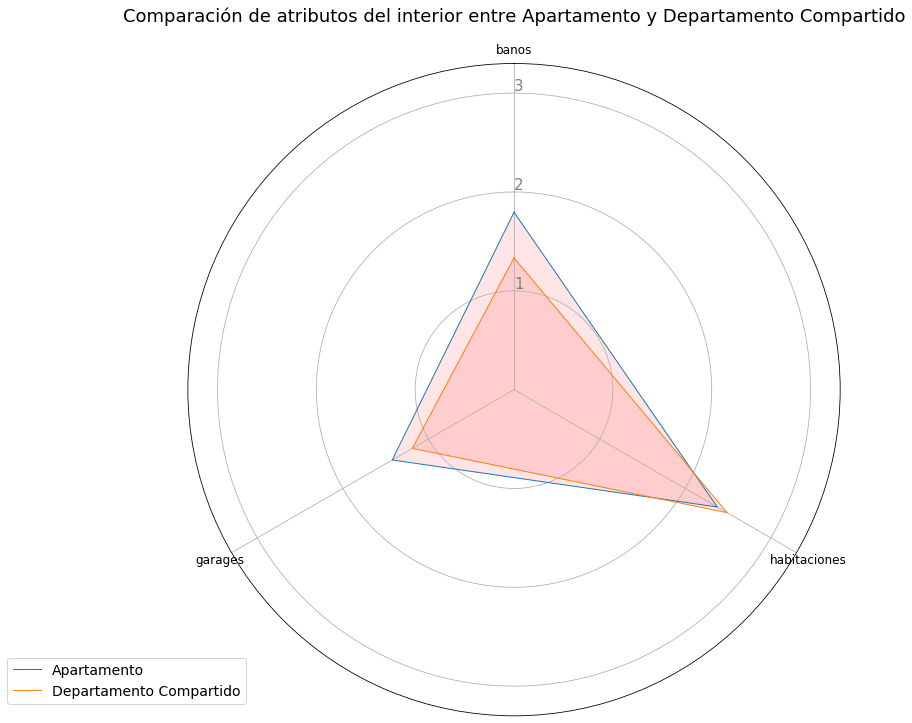

In [305]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Apartamento y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind2
values=df.loc[1].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Apartamento")
ax.fill(angles, values, 'r', alpha=0.1)


# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_apart_dpto.png',bbox_inches = 'tight')
plt.show()

In [306]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

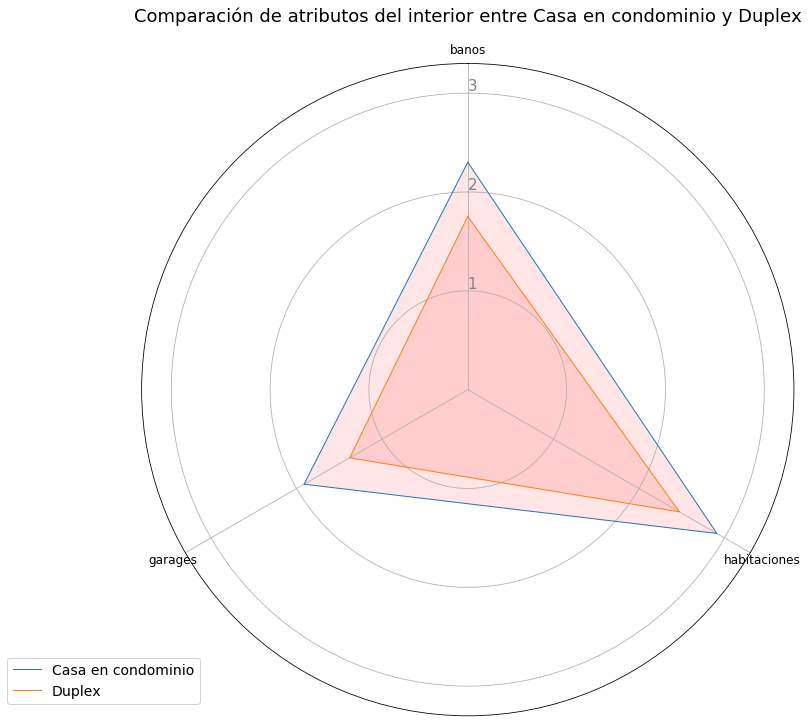

In [307]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa en condominio y Duplex',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_condo_duplex.png',bbox_inches = 'tight')
plt.show()

In [308]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

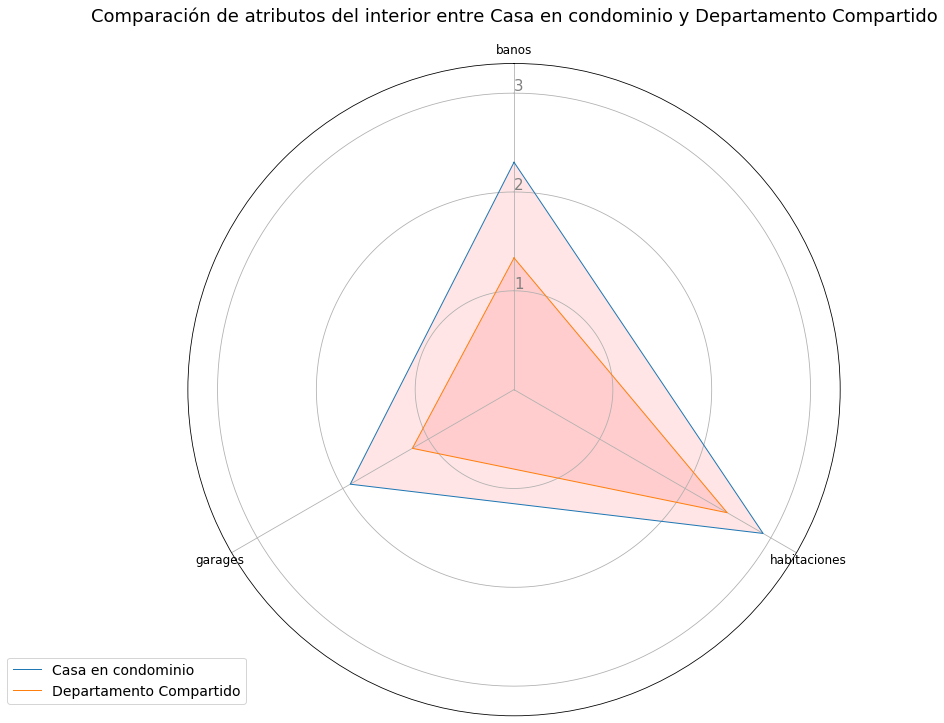

In [309]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Casa en condominio y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable


# Ind3
values=df.loc[2].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Casa en condominio")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_condo_dpto.png',bbox_inches = 'tight')
plt.show()

In [310]:
df = df_navent.copy()
df = df[['tipodepropiedad','banos','habitaciones','garages']]
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio") \
           | (df['tipodepropiedad'] == "Departamento Compartido") | (df['tipodepropiedad'] == "Duplex")].copy()
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio','Departamento Compartido','Duplex'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)
df = df.dropna()
df = df.groupby('tipodepropiedad').agg(np.mean).reset_index()

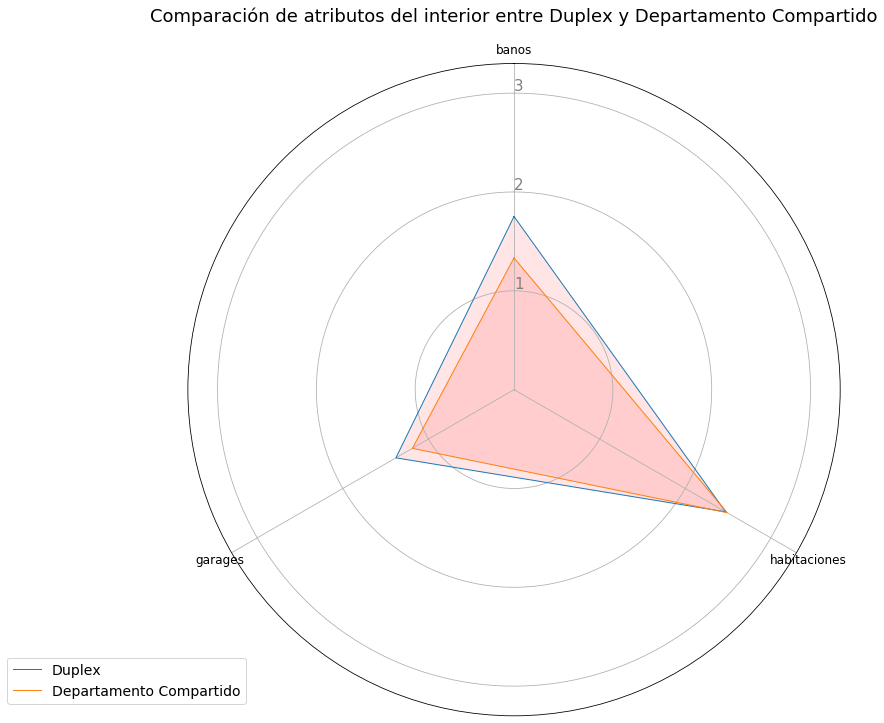

In [311]:
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure()
fig.set_size_inches(18, 12)
ax = fig.add_subplot(111, polar=True)
ax.set_title('Comparación de atributos del interior entre Duplex y Departamento Compartido',pad =10,fontsize=18)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=15)
plt.ylim(0,3.3)
 
 
# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind4
values=df.loc[3].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Duplex")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=df.loc[4].drop('tipodepropiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Departamento Compartido")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1),fontsize=14)
plt.savefig('img/atributos_int_tipos_prop_duplex_dpto.png',bbox_inches = 'tight')
plt.show()